# Turbo Engine data description

CMAPSS, which stands for Commercial Modular Aero-Propulsion System Simulation, is a system to study the degradation of jet engines. It uses MATLAB and Simulink, which are tools used for coding and simulation.

The engine being studied is called a turbofan engine, which is commonly used in aircraft. This type of engine has several important components, including the fan, low-pressure compressor (LPC), high-pressure compressor (HPC), low-pressure turbine (LPT), and high-pressure turbine (HPT).

During the engine's operation, these components experience degradation over time. If the level of degradation in any component exceeds a certain threshold, it means the engine has failed. To prevent engine failures during flights, jet engines are inspected before each takeoff. However, this type of periodic maintenance can be costly.

Given the critical nature of aviation and the safety of passengers, this maintenance strategy is justified. However, it would be more efficient and cost-effective to have a system that provides an early warning if a failure is likely to occur.

Having an early warning can help us prepare for the problem or even prevent it from happening altogether. If we receive a sufficiently early warning, we can take appropriate actions to prevent a disaster. However, if the warning is too conservative and predicts failure too far in advance, it may result in unnecessary expenses.

Therefore, the goal of a predictive maintenance system is to accurately predict the Remaining Useful Life (RUL) of an engine. The RUL prediction should be neither too early nor too late, striking a balance between avoiding failures and avoiding unnecessary costs.

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

### Read txt file

In [2]:
raw_data = pd.read_csv('train_FD001.txt', sep=' ', header = None)
raw_data

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


### Drop Column number 26 & 27 (having NaN Values)

In [3]:
raw_data = raw_data.drop([26,27], axis='columns')

- Column 1: Corresponds to engine number (This column is indexed 0 above because of Python's numbering convention)
- Column 2: Corresponds to cycle number. If engine 1 fails after 192 cycles, the entries of second column for engine 1 will go from 1 to 192. Similarly for other engines.
- Columns 3,4,5: 3 operational settings
- Columns 6-26: 21 sensor measurements

In [4]:
raw_data.columns = ['ID', 'Cycle', 'OpSet1', 'OpSet2', 'OpSet3', 'SensorMeasure1', 'SensorMeasure2', 'SensorMeasure3', 'SensorMeasure4', 'SensorMeasure5', 'SensorMeasure6', 'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure9', 'SensorMeasure10', 'SensorMeasure11', 'SensorMeasure12', 'SensorMeasure13', 'SensorMeasure14', 'SensorMeasure15', 'SensorMeasure16', 'SensorMeasure17', 'SensorMeasure18', 'SensorMeasure19', 'SensorMeasure20', 'SensorMeasure21']
raw_data

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [5]:
raw_data[raw_data['ID'] == 1]

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295


Above command will give you a new DataFrame containing all the rows from the original raw_data DataFrame where the 'ID' column is equal to 1. It effectively subsets the data and allows you to focus on specific data related to the ID 1.

In [6]:
# Making an array which contains EOL of all the Ids
EOL=[]
for sl_no in raw_data['ID']:
        EOL.append( ((raw_data[raw_data['ID'] == sl_no]["Cycle"]).values)[-1])

In the above code after the loop completes, the EOL list will contain the last value of the 'Cycle' column for each unique 'ID' in the DataFrame raw_data.

In [7]:
np.shape(EOL)

(20631,)

Above code is used to determine the shape or dimensions 

In [8]:
raw_data["EOL"]=EOL

Above code create new Column with name EOL that contain EOL of all the Ids

In [9]:
raw_data

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,EOL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,200
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,200
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,200
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,200


## Classification Problem Formulation
The challange of this competetion was to predict the Remaining Useful Life of the engine by using the given sensor's data and operational conditions.
But in this project, we ll try to simplify that by converting it to a Classification Problem. Where, the classes/labels will of 3 types, i.e. Good Condition, Moderate Condition and Warning Condition.
**labels corresponding to each conditions**
- Good Condition - 0
- Moderate Condition - 1
- Warning Condition - 2

### Defining the labels
Here we will define the engine's condition with Life Ratio (LR), which is the ratio between Current Cycle and the End cycle/ End of Life(EOL). If LR=0, that means the component has just started its degradation and LR=1 means, it is completely degraded.
- if LR <= 0.6 - Good Condition
- if 0.6 < LR <= 0.8 - Moderate Condition
- if 0.8 < LR - Warning Condition

In [10]:
# Calculate "LR"
raw_data["LR"] = raw_data["Cycle"].div(raw_data["EOL"])

In [11]:
raw_data

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,EOL,LR
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,0.005208
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,0.010417
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,0.015625
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,0.020833
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,0.026042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,200,0.980000
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,200,0.985000
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,200,0.990000
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,200,0.995000


Drop Column ID and EOL

In [12]:
raw_data=raw_data.drop(columns=['ID','EOL'])

In [13]:
labels=[]
for i in range (0,len(raw_data)):
    if np.array(raw_data["LR"])[i] <= 0.6:
        labels.append(0)
    elif np.array(raw_data["LR"])[i] <= 0.8 :
        labels.append(1)   
    else :
        labels.append(2)  
        
raw_data["labels"]=labels
raw_data  = raw_data.drop(columns=['LR'])   
raw_data

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,labels
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,0
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0
3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0
4,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,2
20627,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,2
20628,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,2


Using txt file converting it into csv format

In [14]:
# raw_data.to_csv('Training_1.csv', index=None)

**Importing all the Training Data-sets**

In [15]:
df1 = pd.read_csv('Training_1.csv')
df2 = pd.read_csv('Training_2.csv')
df3 = pd.read_csv('Training_3.csv')
df4 = pd.read_csv('Training_4.csv')

**Concat all csv file**

In [16]:
df = pd.concat([df1,df2,df3,df4])

In [17]:
df

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,labels
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,0
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0
3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0
4,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,15.46,...,2388.73,8185.69,8.4541,0.03,372,2319,100.0,29.11,17.5234,2
61245,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,21.57,...,2388.46,8185.47,8.2221,0.03,396,2388,100.0,39.38,23.7151,2
61246,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,21.57,...,2388.48,8193.94,8.2525,0.03,395,2388,100.0,39.78,23.8270,2
61247,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,7.96,...,2388.83,8125.64,9.0515,0.02,337,2223,100.0,15.26,9.0774,2


#### Divide the dataframe into feature and trarget
**X** is the Feature Matrix and **y** is the label's column

In [18]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

Using the **train_test_split** function from the **sklearn.model_selection** module, which is part of the **scikit-learn** library. This function is commonly used to split a dataset into training and testing subsets for machine learning tasks.

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)

### Training a model

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

### Performance on Validation set

In [21]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

<Axes: >

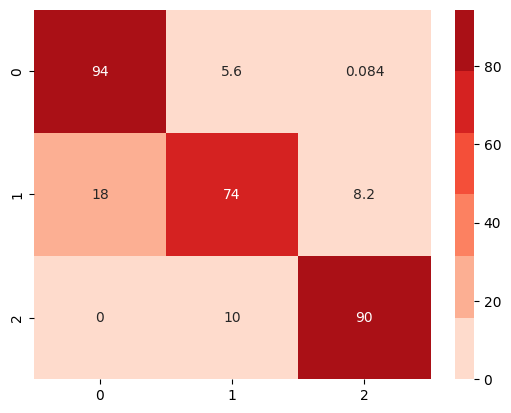

In [22]:
y_pred_model = model.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred_model, normalize ='true')*100)
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot=True,cmap=colormap)

In [23]:
training_data_accuracy = accuracy_score(y_test, y_pred_model)
print("Accuracy Score of Model: ", training_data_accuracy)

Accuracy Score of Model:  0.8923671738588177


- DecisionTreeClassifier -  0.8436018957345972
- KNeighborsClassifier - 0.8562609129458718
- RandomForestClassifier - 0.8938014467448241

In [24]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Performance on Training set

1.0

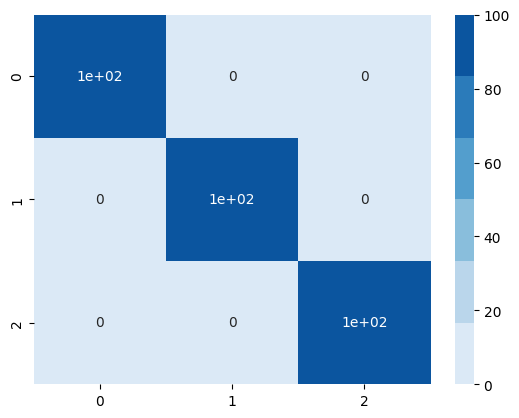

In [25]:
y_pred_RF = model.predict(X_train)

cm = pd.DataFrame(confusion_matrix(y_train, y_pred_RF, normalize ='true')*100)
colormap = sns.color_palette("Blues")
sns.heatmap(cm, annot=True,cmap=colormap)

accuracy_score(y_train, y_pred_RF) # or model.score(X_train,y_train)

**Randomized Search with cross validation for Hyperparameter optimization**
- As the previous model clearly overfits the training data, we need to do some hyperparameter tuning. For that we will do a random search with 3 fold cross validation

In [26]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators=[200, 400, 300]
# Maximum number of levels in tree
max_depth= [10, 20, 30]
# Max number of samples given to each tree 
max_samples= [0.2,0.3,0.4 ]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_samples': max_samples}
print(random_grid)

{'n_estimators': [200, 400, 300], 'max_depth': [10, 20, 30], 'max_samples': [0.2, 0.3, 0.4]}


In [27]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3,n_jobs=-1)
# Fit the random search model
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'max_samples': [0.2, 0.3, 0.4],
                                        'n_estimators': [200, 400, 300]})

In [28]:
rf_random.best_params_

{'n_estimators': 400, 'max_samples': 0.4, 'max_depth': 20}

In [29]:
rf_random.best_score_

0.8899828831036632

0.8936767273634323

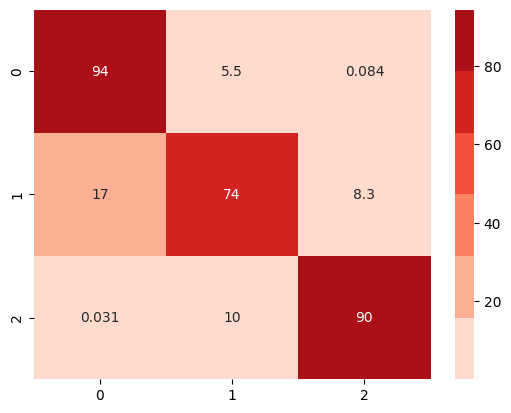

In [30]:
RF_randSer = RandomForestClassifier(n_estimators=300,max_samples=0.4,max_depth= 20)
RF_randSer.fit(X_train, y_train)
y_pred_RF = RF_randSer.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred_RF, normalize ='true')*100)
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot=True,cmap=colormap)

accuracy_score(y_test, y_pred_RF)

#### **Test Data**
Test data are similar to train data with only one difference. While for training data, data are available until failure for each engine, for test data, it is available for an arbitrary number of cycles. Using the given test data, out goal is to predict RUL. For test data, true RUL values are also available so that we can compare the performance of our prediction algorithm.

The given test data is not in the form of training data we created, so now we need to convert that to the same format.

In [34]:
raw_data = pd.read_csv('test_FD001.txt', sep=' ', header = None)
raw_data = raw_data.drop([26,27], axis='columns')
raw_data.columns = ['ID', 'Cycle', 'OpSet1', 'OpSet2', 'OpSet3', 'SensorMeasure1', 'SensorMeasure2', 'SensorMeasure3', 'SensorMeasure4', 'SensorMeasure5', 'SensorMeasure6', 'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure9', 'SensorMeasure10', 'SensorMeasure11', 'SensorMeasure12', 'SensorMeasure13', 'SensorMeasure14', 'SensorMeasure15', 'SensorMeasure16', 'SensorMeasure17', 'SensorMeasure18', 'SensorMeasure19', 'SensorMeasure20', 'SensorMeasure21']

In [35]:
raw_data

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,1,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,...,313.03,2387.78,8048.98,9.2229,0.02,362,2324,100.00,24.31,14.7007
1,1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,...,163.61,2028.09,7863.46,10.8632,0.02,306,1915,84.93,14.36,8.5748
2,1,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,...,129.98,2387.95,8071.13,9.3960,0.02,328,2212,100.00,10.39,6.4365
3,1,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,...,129.48,2387.90,8078.89,9.3594,0.02,328,2212,100.00,10.56,6.2367
4,1,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,...,181.82,2387.87,8057.83,9.3030,0.02,333,2223,100.00,14.85,8.9326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41209,248,277,41.9991,0.8401,100.0,445.00,550.30,1364.40,1129.17,3.91,...,130.87,2388.50,8112.61,9.4427,0.02,331,2212,100.00,10.53,6.2620
41210,248,278,20.0026,0.7005,100.0,491.19,608.00,1494.75,1260.88,9.35,...,314.51,2388.33,8086.83,9.2772,0.02,366,2324,100.00,24.33,14.6486
41211,248,279,34.9988,0.8413,100.0,449.44,555.92,1370.65,1130.97,5.48,...,182.76,2388.64,8100.84,9.3982,0.02,336,2223,100.00,14.69,8.8389
41212,248,280,20.0027,0.7000,100.0,491.19,608.19,1489.11,1256.25,9.35,...,314.17,2388.37,8085.24,9.2727,0.03,366,2324,100.00,24.44,14.6887


This code calculates the number of cycles for each unique ID in the raw_data dataframe and stores the counts in the given_no_of_cycles list. 

In [36]:
given_no_of_cycles=[]
for i in range (1,len(raw_data['ID'].unique())+1):
    given_no_of_cycles.append(len(raw_data[raw_data['ID']==i]))
    print(len(raw_data[raw_data['ID']==i]))
    
given_no_of_cycles=np.array(given_no_of_cycles).reshape([cycle_ran_after.shape[0],1]) 

230
153
141
208
51
146
54
248
284
23
82
270
227
102
168
240
334
247
24
115
202
158
162
174
486
90
144
20
216
229
134
260
107
361
278
159
345
125
214
266
414
200
120
406
78
37
224
214
273
206
137
58
67
81
103
180
121
185
37
135
396
240
158
251
186
97
150
241
162
190
292
118
149
223
203
48
108
106
184
112
60
146
274
88
174
254
167
140
285
118
144
116
200
105
110
123
51
82
237
196
166
443
145
65
351
148
121
145
66
348
342
88
132
218
82
161
97
178
228
170
194
117
236
230
21
220
98
139
315
107
193
115
74
266
435
56
291
239
88
160
19
69
327
34
102
84
116
126
320
202
285
195
130
122
161
28
138
171
160
122
257
99
122
29
178
63
99
74
34
48
355
132
151
135
116
185
146
279
262
367
199
98
125
154
203
47
121
157
107
200
71
203
263
214
186
70
196
115
177
115
139
222
87
19
95
291
179
180
171
135
206
261
288
102
72
264
141
63
110
65
176
178
305
152
39
59
62
126
20
157
230
370
111
179
362
176
221
177
28
204
42
112
199
184
63
29
94
281


NameError: name 'cycle_ran_after' is not defined

We can see that data for 31 cycles are available for engine 1 in test set. Data for 49 cycles are available for engine 2, and so on. Using the available data our goal is to predict RUL for each engine.

In [37]:
len(raw_data['ID'].unique())

248

In [38]:
cycle_ran_after = pd.read_csv('RUL_FD004.txt', sep=' ', header = None)
cycle_ran_after=cycle_ran_after.drop([1], axis='columns')
cycle_ran_after = np.array(cycle_ran_after)
cycle_ran_after

array([[ 22],
       [ 39],
       [107],
       [ 75],
       [149],
       [ 78],
       [ 94],
       [ 14],
       [ 99],
       [162],
       [143],
       [  7],
       [ 71],
       [105],
       [ 12],
       [160],
       [162],
       [104],
       [194],
       [ 82],
       [ 91],
       [ 11],
       [ 26],
       [142],
       [ 39],
       [ 92],
       [ 76],
       [124],
       [ 64],
       [118],
       [  6],
       [ 22],
       [147],
       [126],
       [ 36],
       [ 73],
       [ 89],
       [ 11],
       [151],
       [ 10],
       [ 97],
       [ 30],
       [ 42],
       [ 60],
       [ 85],
       [134],
       [ 34],
       [ 45],
       [ 24],
       [ 86],
       [119],
       [151],
       [142],
       [176],
       [157],
       [ 67],
       [ 97],
       [  8],
       [154],
       [139],
       [ 51],
       [ 33],
       [184],
       [ 46],
       [ 12],
       [133],
       [ 46],
       [ 46],
       [ 12],
       [ 33],
       [ 15],
      

An RUL value of 112 for engine 1 in test set means that it failed 112 cycles after 31st cycle. So engine 1 ran for (31+112) cycles before it failed. Similarly engine two failed 98 cycles after 49th cycle. So engine 2 ran for (49 + 98) cycles in total before it failed. Similar calculation can be done for other engines in test set.

#### **Making EOL column**

In [39]:
EOL=[]
i=0


for i in raw_data['ID']:
        EOL.append(given_no_of_cycles[i-1]+cycle_ran_after[i-1] ) 
        
EOL = np.array(EOL).reshape([len(EOL),1]) 

In [40]:
EOL.shape

(41214, 1)

In [41]:
# Add the 'EOL' column to 'raw_data'
raw_data['EOL']=EOL
raw_data

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,EOL
0,1,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,...,2387.78,8048.98,9.2229,0.02,362,2324,100.00,24.31,14.7007,252
1,1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,...,2028.09,7863.46,10.8632,0.02,306,1915,84.93,14.36,8.5748,252
2,1,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,...,2387.95,8071.13,9.3960,0.02,328,2212,100.00,10.39,6.4365,252
3,1,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,...,2387.90,8078.89,9.3594,0.02,328,2212,100.00,10.56,6.2367,252
4,1,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,...,2387.87,8057.83,9.3030,0.02,333,2223,100.00,14.85,8.9326,252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41209,248,277,41.9991,0.8401,100.0,445.00,550.30,1364.40,1129.17,3.91,...,2388.50,8112.61,9.4427,0.02,331,2212,100.00,10.53,6.2620,307
41210,248,278,20.0026,0.7005,100.0,491.19,608.00,1494.75,1260.88,9.35,...,2388.33,8086.83,9.2772,0.02,366,2324,100.00,24.33,14.6486,307
41211,248,279,34.9988,0.8413,100.0,449.44,555.92,1370.65,1130.97,5.48,...,2388.64,8100.84,9.3982,0.02,336,2223,100.00,14.69,8.8389,307
41212,248,280,20.0027,0.7000,100.0,491.19,608.19,1489.11,1256.25,9.35,...,2388.37,8085.24,9.2727,0.03,366,2324,100.00,24.44,14.6887,307


In [42]:
raw_data["LR"] = raw_data["Cycle"].div(raw_data["EOL"])
# Drop ID and EOL
raw_data=raw_data.drop(columns=['ID','EOL'])
raw_data

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,LR
0,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,13.60,...,2387.78,8048.98,9.2229,0.02,362,2324,100.00,24.31,14.7007,0.003968
1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,9.00,...,2028.09,7863.46,10.8632,0.02,306,1915,84.93,14.36,8.5748,0.007937
2,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,5.69,...,2387.95,8071.13,9.3960,0.02,328,2212,100.00,10.39,6.4365,0.011905
3,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,5.69,...,2387.90,8078.89,9.3594,0.02,328,2212,100.00,10.56,6.2367,0.015873
4,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,7.97,...,2387.87,8057.83,9.3030,0.02,333,2223,100.00,14.85,8.9326,0.019841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41209,277,41.9991,0.8401,100.0,445.00,550.30,1364.40,1129.17,3.91,5.72,...,2388.50,8112.61,9.4427,0.02,331,2212,100.00,10.53,6.2620,0.902280
41210,278,20.0026,0.7005,100.0,491.19,608.00,1494.75,1260.88,9.35,13.66,...,2388.33,8086.83,9.2772,0.02,366,2324,100.00,24.33,14.6486,0.905537
41211,279,34.9988,0.8413,100.0,449.44,555.92,1370.65,1130.97,5.48,8.00,...,2388.64,8100.84,9.3982,0.02,336,2223,100.00,14.69,8.8389,0.908795
41212,280,20.0027,0.7000,100.0,491.19,608.19,1489.11,1256.25,9.35,13.66,...,2388.37,8085.24,9.2727,0.03,366,2324,100.00,24.44,14.6887,0.912052


In [43]:
labels=[]
for i in range (0,len(raw_data)):
    if np.array(raw_data["LR"])[i] <= 0.6:
        labels.append(0)
    elif np.array(raw_data["LR"])[i] <= 0.8 :
        labels.append(1)   
    else :
        labels.append(2)  
        
raw_data["labels"]=labels
raw_data  = raw_data.drop(columns=['LR'])   
raw_data

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,labels
0,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,13.60,...,2387.78,8048.98,9.2229,0.02,362,2324,100.00,24.31,14.7007,0
1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,9.00,...,2028.09,7863.46,10.8632,0.02,306,1915,84.93,14.36,8.5748,0
2,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,5.69,...,2387.95,8071.13,9.3960,0.02,328,2212,100.00,10.39,6.4365,0
3,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,5.69,...,2387.90,8078.89,9.3594,0.02,328,2212,100.00,10.56,6.2367,0
4,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,7.97,...,2387.87,8057.83,9.3030,0.02,333,2223,100.00,14.85,8.9326,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41209,277,41.9991,0.8401,100.0,445.00,550.30,1364.40,1129.17,3.91,5.72,...,2388.50,8112.61,9.4427,0.02,331,2212,100.00,10.53,6.2620,2
41210,278,20.0026,0.7005,100.0,491.19,608.00,1494.75,1260.88,9.35,13.66,...,2388.33,8086.83,9.2772,0.02,366,2324,100.00,24.33,14.6486,2
41211,279,34.9988,0.8413,100.0,449.44,555.92,1370.65,1130.97,5.48,8.00,...,2388.64,8100.84,9.3982,0.02,336,2223,100.00,14.69,8.8389,2
41212,280,20.0027,0.7000,100.0,491.19,608.19,1489.11,1256.25,9.35,13.66,...,2388.37,8085.24,9.2727,0.03,366,2324,100.00,24.44,14.6887,2


In [44]:
#raw_data.to_csv('Test_1.csv', index=None)

**Testing on given Test-Dataset**

In [32]:
df1 = pd.read_csv('Test_1.csv')
df2 = pd.read_csv('Test_2.csv')
df3 = pd.read_csv('Test_3.csv')
df4 = pd.read_csv('Test_4.csv')

test_df = pd.concat([df1,df2,df3,df4])

X_test = test_df.iloc[:,0:-1]
y_test = test_df.iloc[:,-1]

0.9067370849499986

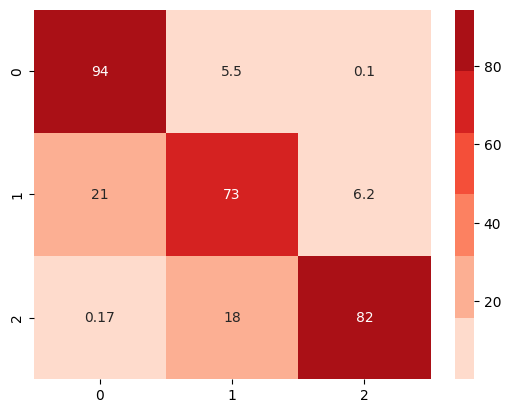

In [33]:
y_pred_RF = RF_randSer.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred_RF, normalize ='true')*100)
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot=True,cmap=colormap)

accuracy_score(y_test, y_pred_RF)